### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing CSV files

In [2]:
df = pd.read_csv('train.csv')
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,0,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [3]:
df.shape

(215, 15)

In [4]:
df.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    int64  
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(2), object(7)
memory usage: 25.3+ KB


### Dropping 'sl_no' column

In [6]:
df.drop('sl_no',axis=1,inplace=True)

### Checking for null counts

In [7]:
df.isnull().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(215, 14)

In [10]:
df['salary'].mean()

288655.4054054054

In [11]:
df['salary'].median()

265000.0

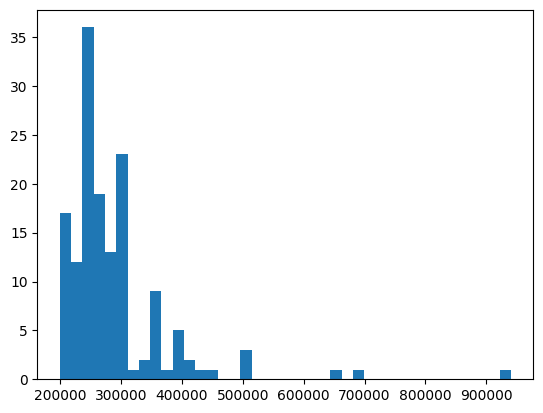

In [12]:
plt.hist(x=df['salary'], bins=40)
plt.show()

In [13]:
df['status'].value_counts()

status
Placed        148
Not Placed     67
Name: count, dtype: int64

### Filling NaN values with zero in 'salary' column

In [15]:
df['salary'] = df['salary'].fillna(0)

In [18]:
df.isnull().sum()

gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

### Unique Values in 'object' data type columns

In [19]:
obj = []
for col in df.columns:
    if df[col].dtype == "object":
        obj.append(col)
        print(col,df[col].unique(),len(df[col].unique()))

ssc_b ['Others' 'Central'] 2
hsc_b ['Others' 'Central'] 2
hsc_s ['Commerce' 'Science' 'Arts'] 3
degree_t ['Sci&Tech' 'Comm&Mgmt' 'Others'] 3
workex ['No' 'Yes'] 2
specialisation ['Mkt&HR' 'Mkt&Fin'] 2
status ['Placed' 'Not Placed'] 2


In [20]:
import warnings
warnings.filterwarnings("ignore")

### Gender Distribution

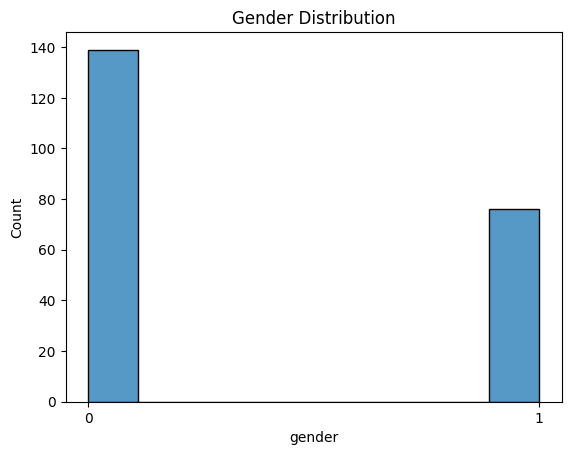

In [21]:
sns.histplot(data=df,x='gender')
plt.title("Gender Distribution")
plt.xticks([0,1],labels=[0,1])
plt.show()

### Pair Plot for numeric columns

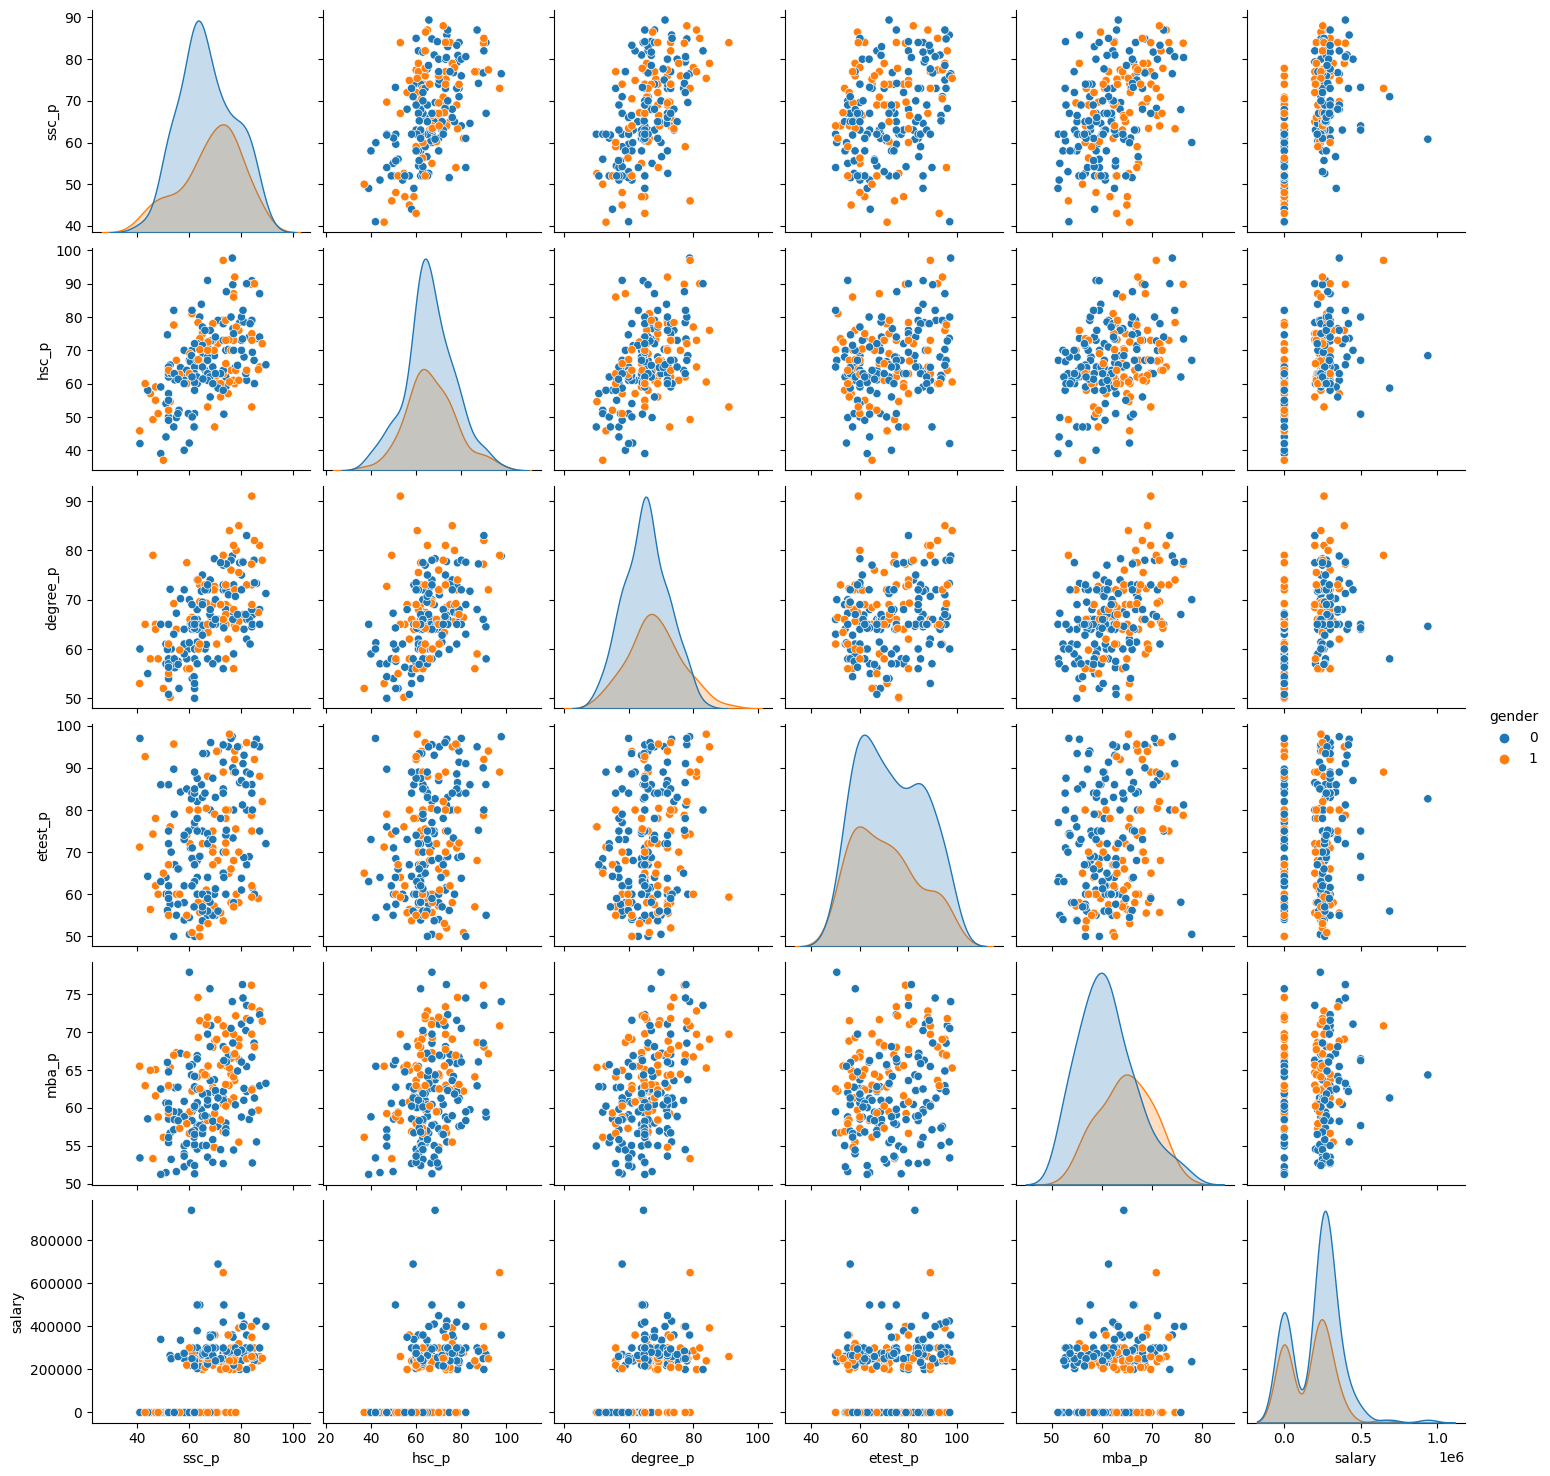

In [22]:
sns.pairplot(data=df, hue='gender')
plt.show()

### Box plot of ssc_p for Mkt&HR and Mkt&Fin Specializations

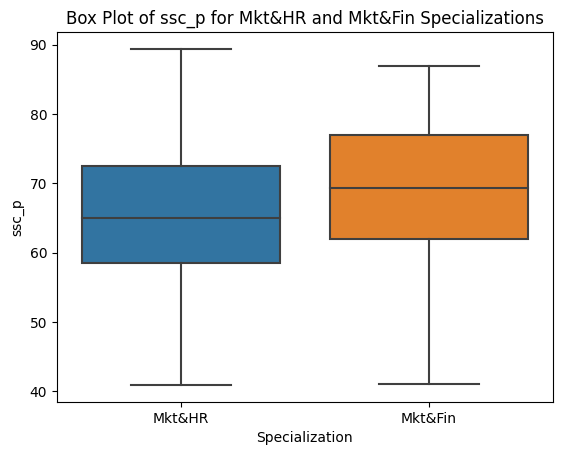

In [23]:
mkt_hr_data = df[df['specialisation'] == 'Mkt&HR']
mkt_fin_data = df[df['specialisation'] == 'Mkt&Fin']
sns.boxplot(x='specialisation', y='ssc_p', data=pd.concat([mkt_hr_data, mkt_fin_data]))
plt.title('Box Plot of ssc_p for Mkt&HR and Mkt&Fin Specializations')
plt.xlabel('Specialization')
plt.ylabel('ssc_p')
plt.show()

### Box plot of hsc_p for Mkt&HR and Mkt&Fin Specializations

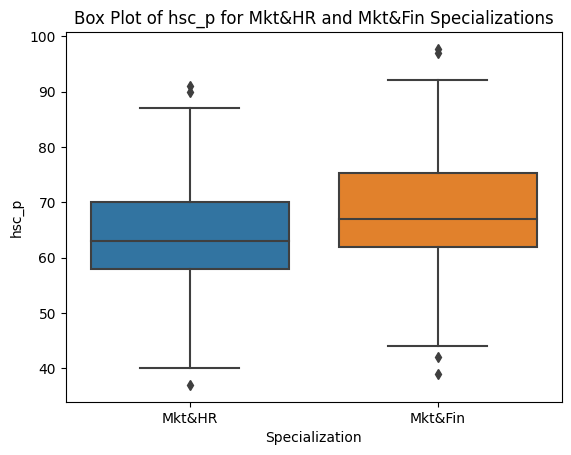

In [24]:
sns.boxplot(x='specialisation', y='hsc_p', data=pd.concat([mkt_hr_data, mkt_fin_data]))
plt.title('Box Plot of hsc_p for Mkt&HR and Mkt&Fin Specializations')
plt.xlabel('Specialization')
plt.ylabel('hsc_p')
plt.show()

### Box plot of degree_p for Mkt&HR and Mkt&Fin Specializations

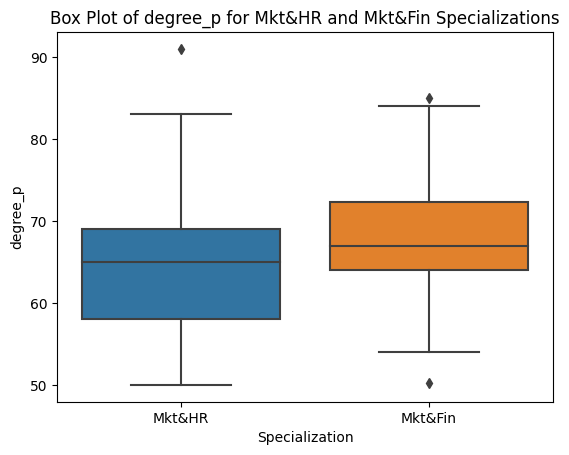

In [25]:
sns.boxplot(x='specialisation', y='degree_p', data=pd.concat([mkt_hr_data, mkt_fin_data]))
plt.title('Box Plot of degree_p for Mkt&HR and Mkt&Fin Specializations')
plt.xlabel('Specialization')
plt.ylabel('degree_p')
plt.show()

### Box plot of etest_p for Mkt&HR and Mkt&Fin Specializations

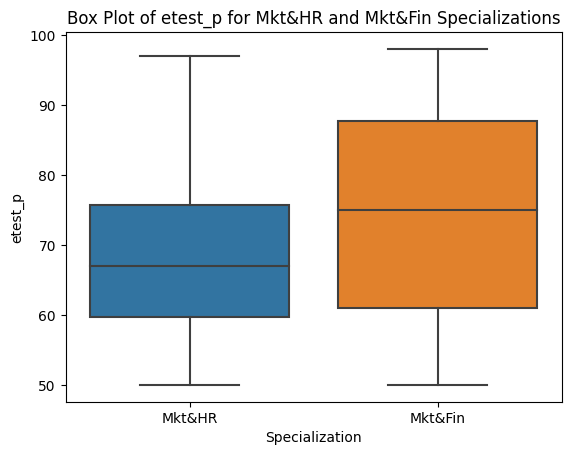

In [26]:
sns.boxplot(x='specialisation', y='etest_p', data=pd.concat([mkt_hr_data, mkt_fin_data]))
plt.title('Box Plot of etest_p for Mkt&HR and Mkt&Fin Specializations')
plt.xlabel('Specialization')
plt.ylabel('etest_p')
plt.show()

### Box plot of mba_p for Mkt&HR and Mkt&Fin Specializations

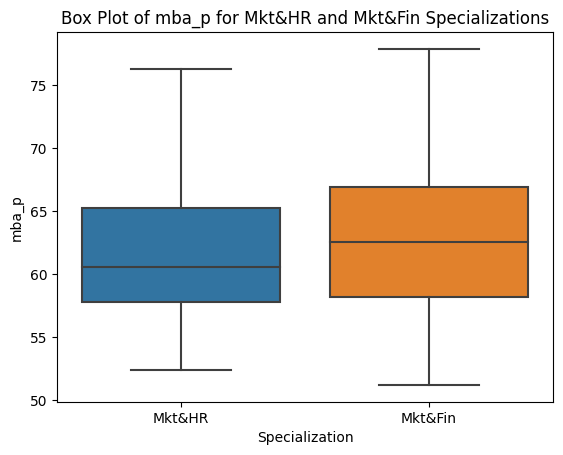

In [27]:
sns.boxplot(x='specialisation', y='mba_p', data=pd.concat([mkt_hr_data, mkt_fin_data]))
plt.title('Box Plot of mba_p for Mkt&HR and Mkt&Fin Specializations')
plt.xlabel('Specialization')
plt.ylabel('mba_p')
plt.show()

### Placement Status Distribution with Gender

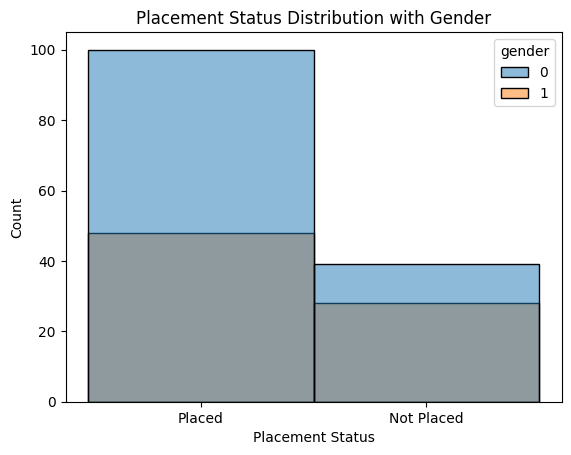

In [29]:
sns.histplot(data=df,x='status',hue='gender')
plt.title('Placement Status Distribution with Gender')
plt.xlabel('Placement Status')
plt.show()

### Placement Status Distribution with Work Experience

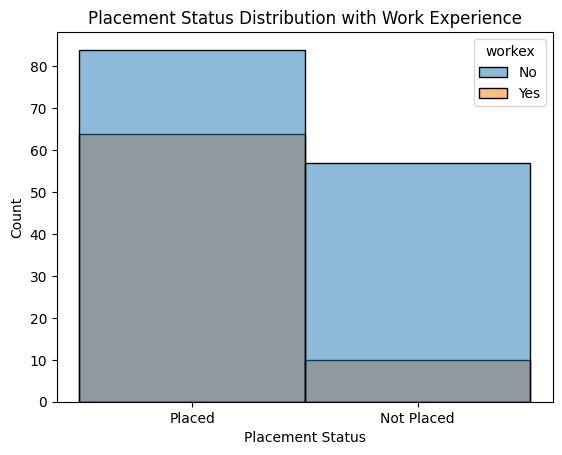

In [30]:
sns.histplot(data=df,x='status',hue='workex')
plt.title('Placement Status Distribution with Work Experience')
plt.xlabel('Placement Status')
plt.show()

### Pie Chart of Specialization

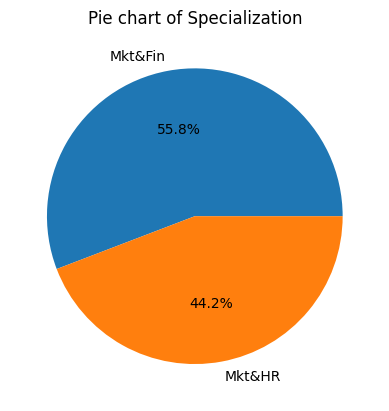

In [31]:
plt.pie(df['specialisation'].value_counts(), labels=df['specialisation'].value_counts().index, autopct='%1.1f%%')
plt.title("Pie chart of Specialization")
plt.show()

### Salary Distribution for Placed Candidates

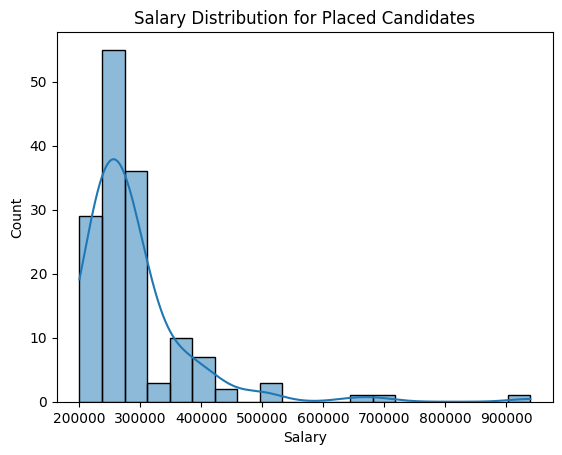

In [34]:
placed_data = df[df['status'] == 'Placed']
sns.histplot(placed_data['salary'], kde=True, bins=20)
plt.title('Salary Distribution for Placed Candidates')
plt.xlabel('Salary')
plt.ylabel('Count')
plt.show()

In [35]:
cols = []
for col in df.columns:
    if df[col].dtype != "object":
        cols.append(col)

### Correlation in numerica variables

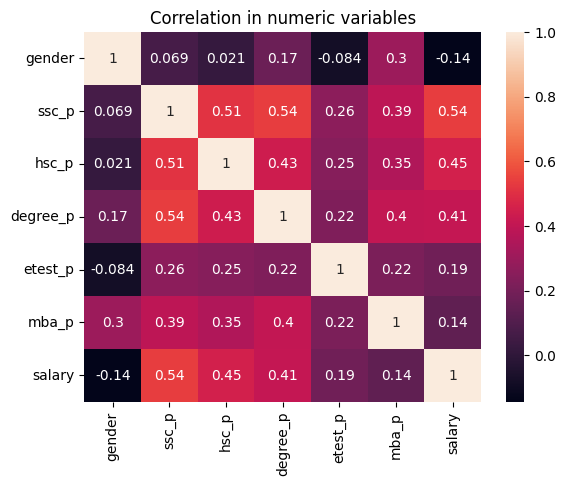

In [40]:
corr = df[cols].corr()
sns.heatmap(corr,annot=True)
plt.title('Correlation in numeric variables')
plt.show()

In [41]:
for col in df.columns:
    if df[col].dtype == "object":
        print(col,df[col].unique(),len(df[col].unique()))

ssc_b ['Others' 'Central'] 2
hsc_b ['Others' 'Central'] 2
hsc_s ['Commerce' 'Science' 'Arts'] 3
degree_t ['Sci&Tech' 'Comm&Mgmt' 'Others'] 3
workex ['No' 'Yes'] 2
specialisation ['Mkt&HR' 'Mkt&Fin'] 2
status ['Placed' 'Not Placed'] 2


### Performing One-hot encoding for categorical variables with 2 unique values

In [42]:
df['ssc_b_Central'] = df['ssc_b'].map({'Central':1,'Others':0})

In [44]:
df['hsc_b_Central'] = df['hsc_b'].map({'Central':1,'Others':0})

In [45]:
df['workex'] = df['workex'].map({'No':0,'Yes':1})

In [46]:
df['status'] = df['status'].map({'Placed':1,'Not Placed':0})

In [47]:
df['specialisation_fin'] = df['specialisation'].map({'Mkt&HR':0,'Mkt&Fin':1})

In [48]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,ssc_b_Central,hsc_b_Central,specialisation_fin
0,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,0,55.0,Mkt&HR,58.80,1,270000.0,0,0,0
1,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,1,86.5,Mkt&Fin,66.28,1,200000.0,1,0,1
2,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,0,75.0,Mkt&Fin,57.80,1,250000.0,1,1,1
3,0,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,0,66.0,Mkt&HR,59.43,0,0.0,1,1,0
4,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,0,96.8,Mkt&Fin,55.50,1,425000.0,1,1,1


In [49]:
df.drop(['ssc_b','hsc_b','specialisation'],axis=1,inplace=True)

In [89]:
df.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,mba_p,status,salary,ssc_b_Central,hsc_b_Central,specialisation_fin
0,0,67.00,91.00,Commerce,58.00,Sci&Tech,0,55.0,58.80,1,270000.0,0,0,0
1,0,79.33,78.33,Science,77.48,Sci&Tech,1,86.5,66.28,1,200000.0,1,0,1
2,0,65.00,68.00,Arts,64.00,Comm&Mgmt,0,75.0,57.80,1,250000.0,1,1,1
3,0,56.00,52.00,Science,52.00,Sci&Tech,0,66.0,59.43,0,0.0,1,1,0
4,0,85.80,73.60,Commerce,73.30,Comm&Mgmt,0,96.8,55.50,1,425000.0,1,1,1


### Performing One-Hot Encoding

In [51]:
ohe = pd.get_dummies(df[['hsc_s','degree_t']],drop_first=True).astype(int)
ohe

,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech
0,1,0,0,1
1,0,1,0,1
2,0,0,0,0
3,0,1,0,1
4,1,0,0,0
...,...,...,...,...
210,1,0,0,0
211,0,1,0,1
212,1,0,0,0
213,1,0,0,0


### Concatinating our dataframe

In [53]:
df1 = pd.concat([ohe,df.drop(['hsc_s','degree_t'],axis=1)],axis=1)
df1.head()

,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech,gender,ssc_p,hsc_p,degree_p,workex,etest_p,mba_p,status,salary,ssc_b_Central,hsc_b_Central,specialisation_fin
0,1,0,0,1,0,67.00,91.00,58.00,0,55.0,58.80,1,270000.0,0,0,0
1,0,1,0,1,0,79.33,78.33,77.48,1,86.5,66.28,1,200000.0,1,0,1
2,0,0,0,0,0,65.00,68.00,64.00,0,75.0,57.80,1,250000.0,1,1,1
3,0,1,0,1,0,56.00,52.00,52.00,0,66.0,59.43,0,0.0,1,1,0
4,1,0,0,0,0,85.80,73.60,73.30,0,96.8,55.50,1,425000.0,1,1,1


### Correlation of Features with Target Variable

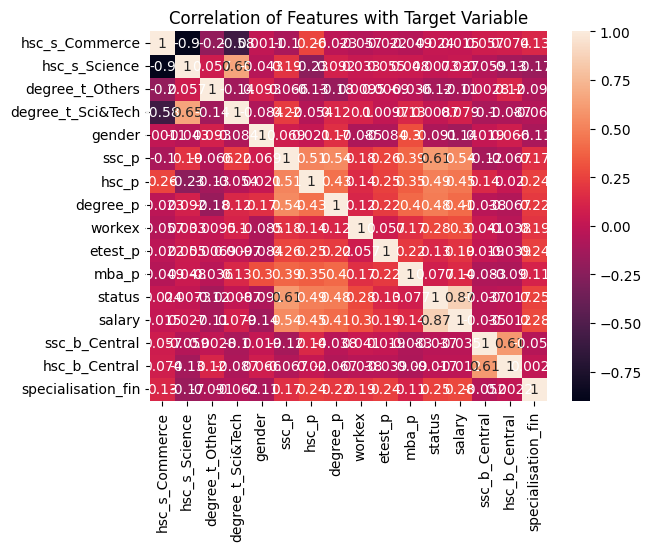

In [54]:
corr1 = df1.corr()
sns.heatmap(corr1,annot=True)
plt.title('Correlation of Features with Target Variable')
plt.show()

In [58]:
correlated_variable = corr1['salary'].abs().sort_values(ascending=False)

In [59]:
correlated_variable

salary                1.000000
status                0.865774
ssc_p                 0.538090
hsc_p                 0.452569
degree_p              0.408371
workex                0.298285
specialisation_fin    0.275766
etest_p               0.186988
gender                0.143110
mba_p                 0.139823
degree_t_Others       0.107139
degree_t_Sci&Tech     0.079351
ssc_b_Central         0.034594
hsc_s_Science         0.026890
hsc_s_Commerce        0.015239
hsc_b_Central         0.011544
Name: salary, dtype: float64

### Independent Variables

In [60]:
X = df1.drop('salary',axis=1)
X

,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech,gender,ssc_p,hsc_p,degree_p,workex,etest_p,mba_p,status,ssc_b_Central,hsc_b_Central,specialisation_fin
0,1,0,0,1,0,67.00,91.00,58.00,0,55.0,58.80,1,0,0,0
1,0,1,0,1,0,79.33,78.33,77.48,1,86.5,66.28,1,1,0,1
2,0,0,0,0,0,65.00,68.00,64.00,0,75.0,57.80,1,1,1,1
3,0,1,0,1,0,56.00,52.00,52.00,0,66.0,59.43,0,1,1,0
4,1,0,0,0,0,85.80,73.60,73.30,0,96.8,55.50,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,0,0,0,0,80.60,82.00,77.60,0,91.0,74.49,1,0,0,1
211,0,1,0,1,0,58.00,60.00,72.00,0,74.0,53.62,1,0,0,1
212,1,0,0,0,0,67.00,67.00,73.00,1,59.0,69.72,1,0,0,1
213,1,0,0,0,1,74.00,66.00,58.00,0,70.0,60.23,1,0,0,0


### Dependent Variables

In [61]:
y = df1['salary']

In [62]:
y

0      270000.0
1      200000.0
2      250000.0
3           0.0
4      425000.0
         ...   
210    400000.0
211    275000.0
212    295000.0
213    204000.0
214         0.0
Name: salary, Length: 215, dtype: float64

### Splitting data into Training set and Testing set

In [64]:
from sklearn.model_selection import train_test_split

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_train

,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech,gender,ssc_p,hsc_p,degree_p,workex,etest_p,mba_p,status,ssc_b_Central,hsc_b_Central,specialisation_fin
93,1,0,0,0,0,52.00,62.0,54.0,0,72.00,55.41,0,1,1,0
84,0,1,0,1,0,70.00,63.0,70.0,1,55.00,62.00,1,1,0,1
95,1,0,0,0,0,73.00,78.0,65.0,1,95.46,62.16,1,1,0,1
137,1,0,0,0,0,67.00,63.0,72.0,0,56.00,60.41,1,0,1,0
210,1,0,0,0,0,80.60,82.0,77.6,0,91.00,74.49,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0,1,0,1,0,61.08,50.0,54.0,0,71.00,65.69,0,0,0,1
14,1,0,0,0,0,62.00,47.0,50.0,0,76.00,54.96,0,1,1,0
92,0,1,0,0,1,60.23,69.0,66.0,0,72.00,59.47,1,1,1,1
179,0,1,0,1,1,77.80,64.0,64.2,0,75.50,72.14,0,1,1,0


### Performing Normalization

In [63]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [71]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Training the model

In [73]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train_scaled,y_train)
reg.score(X_test_scaled,y_test)

0.7201858259203172

### Finding best model

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

In [75]:
algos = {
    'linear_regression': {
        'model': LinearRegression(),
        'params': {

        }
    },
    'lasso': {
        'model': Lasso(max_iter=100000),
        'params': {
            'alpha': [1,2],
            'selection': ['random','cyclic']
        }
    },
    'ridge': {
        'model': Ridge(max_iter=100000),
        'params': {
            'alpha': [1,2]
        }
    },
    'decision_tree': {
        'model': DecisionTreeRegressor(),
        'params': {
            'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
            'splitter': ['best','random']
        }
    },
    'svr': {
        'model': SVR(max_iter=10000000),
        'params': {
         
        }
    },
    'random_forest': {
        'model': RandomForestRegressor(),
        'params': {
            'n_estimators': [1,5,10,20,50]
        }
    },
    'gradient_boosting': {
        'model': GradientBoostingRegressor(),
        'params': {
            'n_estimators': [1,5,10,20,50],
            'learning_rate': [0.001,0.01,0.1,0.5]
        }
    }
}

In [76]:
X_scaled = scaler.transform(X)

In [77]:
scores= []
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=10)
for algo_name, mp in algos.items():
   reg = GridSearchCV(mp['model'], mp['params'], cv=cv, return_train_score=False)
   reg.fit(X_scaled, y)
   scores.append(
      {
         'model': algo_name,
         'best_score': reg.best_score_,
         'best_params': reg.best_params_
      }
   ) 

In [78]:
score = pd.DataFrame(scores, columns=['model','best_score','best_params'])
score

,model,best_score,best_params
0,linear_regression,0.717640,{}
1,lasso,0.717644,"{'alpha': 2, 'selection': 'random'}"
2,ridge,0.716467,{'alpha': 1}
3,decision_tree,0.652944,"{'criterion': 'absolute_error', 'splitter': 'r..."
4,svr,-0.110433,{}
5,random_forest,0.695185,{'n_estimators': 10}
6,gradient_boosting,0.692711,"{'learning_rate': 0.1, 'n_estimators': 20}"


### Training Ridge model

In [86]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1)
ridge.fit(X_train_scaled,y_train)
ridge.score(X_test_scaled,y_test)

0.7219489075732639

In [87]:
import pickle

### Saving our model

In [88]:
with open('model.pkl','wb') as f:
    pickle.dump(ridge,f)

### Saving our scaler

In [89]:
with open('scaler.pkl','wb') as f:
    pickle.dump(scaler,f)